# Seaborn Min-Lab

---

## Introduction to Seaborn

Seaborn is a powerful Python data visualization library built on top of Matplotlib. It provides a high-level interface for drawing different types of graphics. Seaborn is widely used for exploratory data analysis and and presenting results in a clear way.

This tutorial aims to provide a comprehensive guide to using Seaborn for data visualization in Python. We will cover various types of plots, including bar graphs, line graphs, scatter plots, histograms, and more. Each section will include detailed explanations and code examples. We will also discuss how to combine different plots and customize their appearance to create visually appealing and insightful representations of your data.

By the end of this tutorial, you should be able to confidently use Seaborn to create a wide range of statistical plots and effectively communicate your data insights.

## Tutorial Structure

This tutorial is structured as follows:

1.  **Setting up Colab**
2.  **Histograms**
3.  **Bar Graphs**
4.  **Line Graphs**
5.  **Scatter Plots**
6.  **Stacked Bar Graphs**
7.  **Combining Graphs**
8.  **Other useful plots**
9.  **Customization**
10. **Save plots**

## 1. Setting up the Environment

Before we dive into creating visualizations, you need to set up your Python environment and import the necessary libraries. While Seaborn is built on top of Matplotlib, this tutorial will only use Seaborn's high-level interface for plotting.

We also import another library, Pandas, for data manipulation and cleaning.

In [1]:
import seaborn as sns
import pandas as pd

print("Seaborn version:", sns.__version__)
print("Pandas version:", pd.__version__)


Seaborn version: 0.13.2
Pandas version: 2.2.2


If these commands run without errors and display the version numbers, you are ready to proceed!

### Loading Datasets

Seaborn comes with several built-in datasets that are very useful for learning and practicing. These datasets are readily available through the `seaborn.load_dataset()` function.

Let's load a few common datasets that we will use throughout this tutorial:

In [2]:
# Load the 'tips' dataset
tips = sns.load_dataset('tips')
print("Tips dataset head:")
print(tips.head())
print("\nTips dataset info:")
tips.info()

# Load the 'iris' dataset
iris = sns.load_dataset('iris')
print("\nIris dataset head:")
print(iris.head())
iris.info()

# Load the 'flights' dataset
flights = sns.load_dataset("flights")
print("\nFlights dataset head:")
print(flights.head())
iris.info()


Tips dataset head:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Tips dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB

Iris dataset head:
   sepal_length  sepal_width  petal_length  petal_width species
0       

The `tips` dataset contains information about restaurant tips, `iris` is a classic dataset for flower classification, and `flights` contains airline passenger data over time.



## 2. Histograms

Histograms are used to visualize the distribution of a single numerical variable. They divide the data into bins and show the number of observations (or frequency) that fall into each bin. Seaborn provides `sns.histplot()` for creating histograms.

Let's visualize the distribution of `total_bill` in the `tips` dataset.

Text(0, 0.5, 'Frequency')

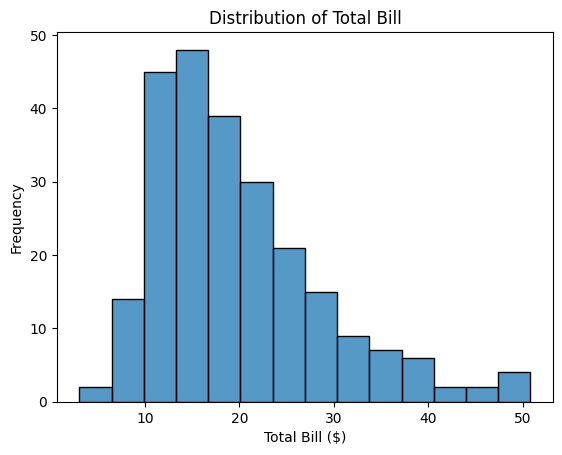

In [3]:
# Create a histogram
histpl = sns.histplot(data=tips,
                      x="total_bill")

histpl.set_title("Distribution of Total Bill")
histpl.set_xlabel("Total Bill ($)")
histpl.set_ylabel("Frequency")

In this example:
- `x="total_bill"` specifies the numerical variable for the histogram
- `data=tips` indicates the DataFrame to use.
- We use the returned axes object to set titles and labels
  - `brplot.set_title()` sets the title of the plot.  
  - `brplot.set_xlabel()` sets the label of the x-axis.  
  - `brplot.set_ylabel()` sets the label of the y-axis.

**Interpretation:** The plot shows that the distrivution of total bills is right-skewed. Most bills fall around \$10–\$20, tapering off above ~\$25 with only a few as high as \$40–\$50.  

**Note:** When you create a plot in Python, you can assign it to any variable name you like; in this example, I’ve named mine `histpl`.

### Bins and KDE for histograms

We can further customize our histogram by adjusting the **number of bins** and adding a **Kernel Density Estimate (KDE)** curve.  
- The `bins` parameter controls how many intervals (bars) the data is divided into. You can adjust this to see more or less detail in the distribution.
- Setting `kde=True` overlays a smooth curve that estimates the underlying probability density, helping to visualize the overall shape of the distribution without relying solely on the binning.


Text(0, 0.5, 'Frequency')

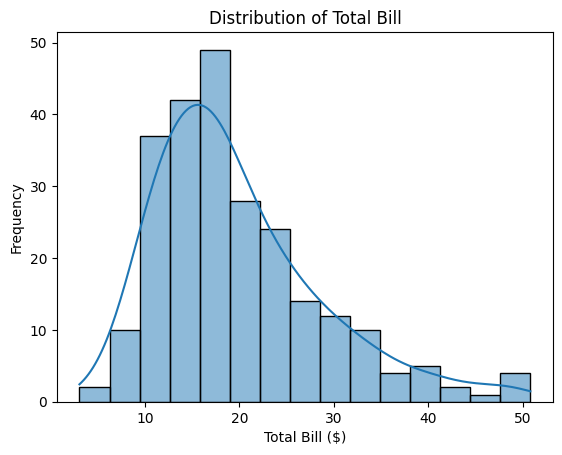

In [4]:
histpl = sns.histplot(
    data=tips,
    x="total_bill",
    bins=15,       # Number of bins
    kde=True       # Overlay KDE curve
)

histpl.set_title("Distribution of Total Bill")
histpl.set_xlabel("Total Bill ($)")
histpl.set_ylabel("Frequency")

**Interpretation:** The kernel density estimate (KDE) smooths the underlying histogram and highlights the unimodal shape of the distribution. It shows a pronounced peak between \$10 and \$20, followed by a gradual decline with a long right tail extending above \$40.

### Count plot

A **count plot** is similar in spirit to a histogram but is designed for **categorical** data rather than continuous data.  Instead of dividing a range into bins, `sns.countplot()` simply counts the number of observations for each category and displays these counts as bars.  This makes it a quick way to visualize the frequency distribution of a categorical variable.


In this case, we want to show the number of observations in each category (`day`).

Text(0, 0.5, 'Count')

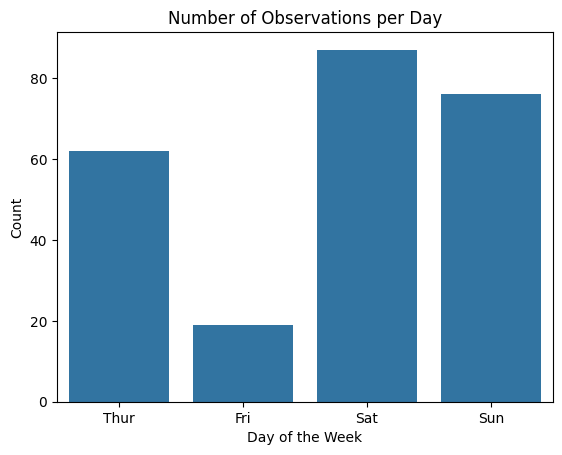

In [5]:
# Create a count plot
cntpl = sns.countplot(x="day",
                      data=tips)

cntpl.set_title("Number of Observations per Day")
cntpl.set_xlabel("Day of the Week")
cntpl.set_ylabel("Count")

In this case, `countplot` automatically counts the occurrences of each category in the specified column.

**Interpretation:** The figure reveals that the distribution of bills across days is uneven: approximately one-third occur on Saturday, another third on Sunday, one-quarter on Thursday, and fewer than 10 percent on Friday.

## 3. Bar Graphs

Bar graphs are another fundamental tool for visualizing data. They display the distribution of a categorical variable. In Seaborn, `sns.barplot()` is typically used to create bar charts. By default, it calculates and plots a **statistical summary** (usually the mean) of a numerical variable for each category on the x-axis, and can also show confidence intervals.

### Basic Bar Graph

Let's start by creating a simple bar graph that shows the average `total_bill` for each `day` in the `tips` dataset. By default, `barplot` calculates the mean value for each category and displays a 95% confidence interval around that mean.


Text(0, 0.5, 'Average Total Bill ($)')

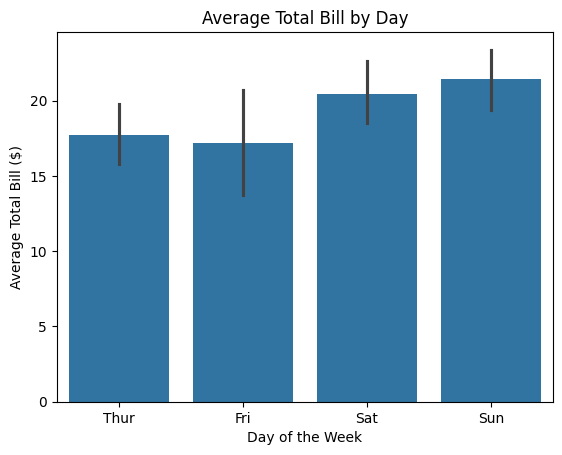

In [6]:
# Create a bar plot with built-in styling
brplot = sns.barplot(
                 x="day",
                 y="total_bill",
                 data=tips)

brplot.set_title("Average Total Bill by Day")
brplot.set_xlabel("Day of the Week")
brplot.set_ylabel("Average Total Bill ($)")


**Interpretation:** The figure shows that, on average,  bills are larger on weekend days (Sat/Sun ≈ \$20–\$21) than on Thursday and Friday (≈ \$17–\$18). The uncertainty intervals are wide and overlap across days, indicating that a formal statistical test would be required to determine whether the apparent weekend–weekday difference is significant.


### Bar Graph without Confidence Intervals

Sometimes you may want to remove the confidence intervals, for example when plotting population-level data or when the intervals are not relevant to your analysis.You can do this by setting the `errorbar` parameter to `None`.

Text(0, 0.5, 'Average Total Bill ($)')

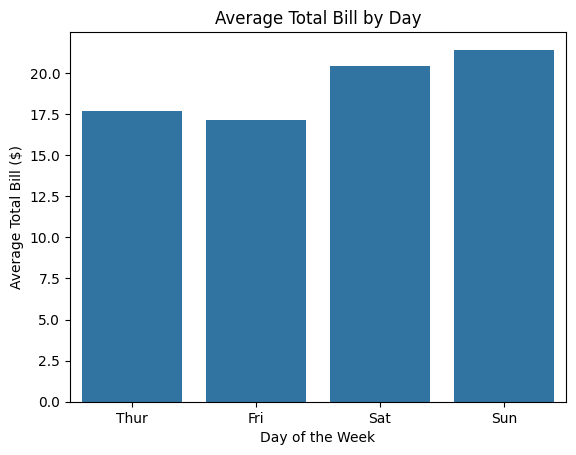

In [7]:
# Create a bar plot without confidence intervals
brplot = sns.barplot(
                 x="day",
                 y="total_bill",
                 errorbar=None,
                 data=tips)

brplot.set_title("Average Total Bill by Day")
brplot.set_xlabel("Day of the Week")
brplot.set_ylabel("Average Total Bill ($)")



## 4. Line Graphs

Line graphs are ideal for showing trends over time or across an ordered category. They connect data points with lines, making it easy to see patterns and changes. In Seaborn, `sns.lineplot()` is the primary function for creating line graphs.


Let's use the `flights` dataset, which contains the number of airline passengers over months and years, to demonstrate a line plot.

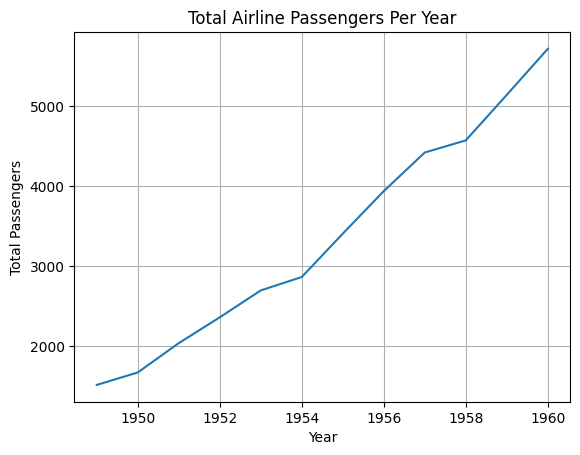

In [8]:
# To plot trends over time, we often need to aggregate data.
# Let's look at the total passengers per year.
flights_yearly = flights.groupby("year")["passengers"].sum().reset_index()

# Create a line plot
lnpl_year = sns.lineplot(x="year",
                  y="passengers",
                  data=flights_yearly)

lnpl_year.set_title("Total Airline Passengers Per Year")
lnpl_year.set_xlabel("Year")
lnpl_year.set_ylabel("Total Passengers")
lnpl_year.grid(True)


**Interpretation:** The Figure plots the annual number of airline passengers (in thousands) from 1949 to 1960. The x-axis marks calendar years, while the y-axis records passenger totals (in thousands). The series shows steady growth, from about 1,500,000 passengers in 1949 to nearly 6,000,000 by 1960. This plot shows the overall trend of airline passengers increasing over the years.

**Notice** how `ax.grid(True)` is used to add a grid directly through the axes object returned by Seaborn, avoiding `plt.grid()`.

We can also visualize the trend of passengers per month, across different years. For this, we can use the `hue` parameter to differentiate lines by year. Seaborn's figure-level `relplot` is particularly well-suited for this, as it can handle multiple subplots and legends automatically.

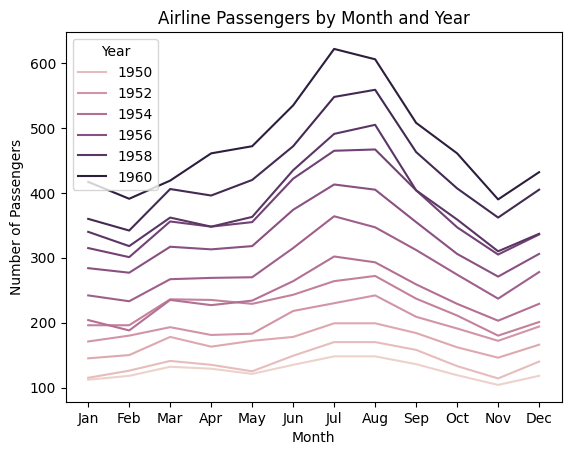

In [9]:
lnpl_month = sns.lineplot(
    x="month",
    y="passengers",
    hue="year",
    data=flights
)

# Set labels and title using Axes methods
lnpl_month.set_xlabel("Month")
lnpl_month.set_ylabel("Number of Passengers")
lnpl_month.set_title("Airline Passengers by Month and Year")

# Add legend
lnpl_month.legend(title="Year", loc="upper left")

**Intepretation:** The figure plots monthly airline passengers from 1950 to 1960. The x-axis marks months of the year, while the y-axis shows the number of passengers (in thousands). Each line traces a different year. The figure reveals two clear patterns: (1) a strong seasonal cycle, with peaks in July–August and troughs in November–February; and (2) steady growth across years, as seen in the previous figure.

Here, `hue="year"` creates a separate line for each year, allowing us to easily compare monthly passenger numbers across different years.  We also added a legend using `lnpl_month.legend()`. The `loc` parameter controls where the legend is placed within the plot area.  You can check the full list of possible `loc` values in the Seaborn documentation by running:



In [10]:
help(lnpl_month.legend)

Help on method legend in module matplotlib.axes._axes:

legend(*args, **kwargs) method of matplotlib.axes._axes.Axes instance
    Place a legend on the Axes.

    Call signatures::

        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)

    The call signatures correspond to the following different ways to use
    this method:

    **1. Automatic detection of elements to be shown in the legend**

    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.

    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::

        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()

    or::

        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()

    .. note::
        Specific artists can be excluded from the autom

One minor issue with this plot is that the legend overlaps some of the lines, making them harder to read. A simple solution is to move the legend outside the plotting area so it doesn’t obstruct any data.  We can do this by specifying the legend’s position using the `bbox_to_anchor` parameter in `lnpl_month.legend()`.


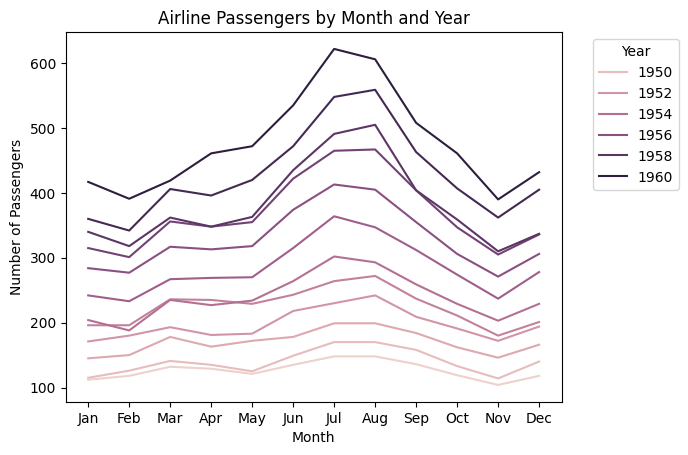

In [11]:
lnpl_month = sns.lineplot(
    x="month",
    y="passengers",
    hue="year",
    data=flights
)

# Set labels and title using Axes methods
lnpl_month.set_xlabel("Month")
lnpl_month.set_ylabel("Number of Passengers")
lnpl_month.set_title("Airline Passengers by Month and Year")

# Move legend outside
lnpl_month.legend(title="Year",
                  bbox_to_anchor=(1.05, 1),
                  loc="upper left")


In this case, `(1.05, 1)` places the anchor point **slightly to the right** of the top-right corner (because `1.05` is just beyond `1` on the x-axis).






## 5. Scatter Plots

Scatter plots are used to observe relationships between two numerical variables. They are excellent for identifying correlations, clusters, and outliers in data. Seaborn provides `sns.scatterplot()` for this purpose.

### Basic Scatter Plot

Let's use the `iris` dataset to visualize the relationship between `sepal_length` and `sepal_width`.

Text(0, 0.5, 'Sepal Width (cm)')

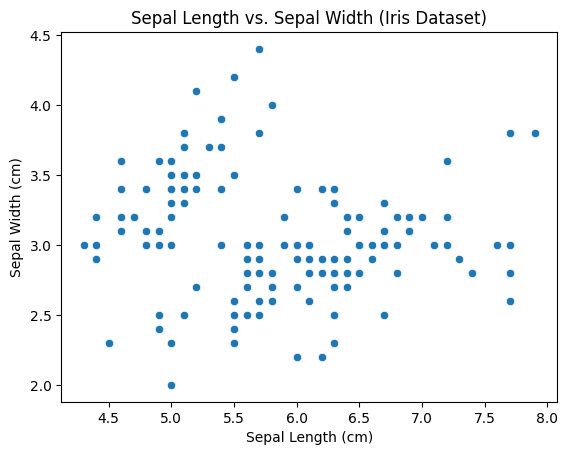

In [12]:
sctpl = sns.scatterplot(x="sepal_length",
                        y="sepal_width",
                        data=iris)

sctpl.set_title("Sepal Length vs. Sepal Width (Iris Dataset)")
sctpl.set_xlabel("Sepal Length (cm)")
sctpl.set_ylabel("Sepal Width (cm)")


As we did before with the line plot (lnpl_month), we can also add a third variable to the plot using the `hue` parameter to color-code points based on a categorical variable, like `species` in the `iris` dataset.

**Interpretation:** In this scatterplot each point represent a flower. Lengths range ≈4.3–7.9 cm and widths ≈2.0–4.4 cm. The plot suggests a mild negative association, i.e., wider sepals are generally shorter. However, dispersion is substantial, with the highest density around 5.0–5.8 cm length and 2.6–3.5 cm width.

### Scatter Plot with hue (3 variables)


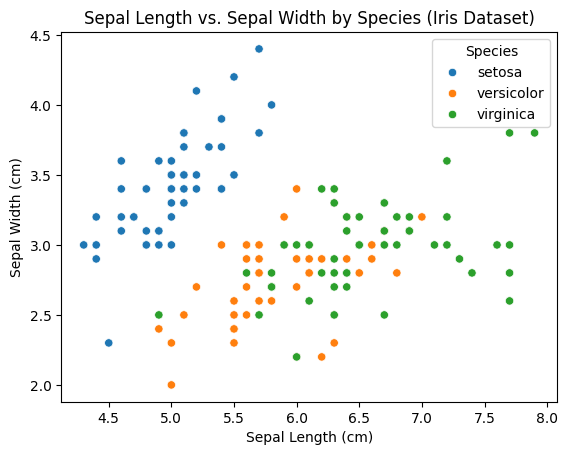

In [13]:
# Create a scatter plot with hue
sctpl_species = sns.scatterplot(x="sepal_length",
                                y="sepal_width",
                                hue="species",
                                data=iris)

sctpl_species.set_title("Sepal Length vs. Sepal Width by Species (Iris Dataset)")
sctpl_species.set_xlabel("Sepal Length (cm)")
sctpl_species.set_ylabel("Sepal Width (cm)")
sctpl_species.legend(title="Species")


This helps in visually distinguishing the different species and observing if their sepal dimensions cluster differently.

**Interpretation:** The scatterplot shows that species differ systematically in sepal characteristics. Setosa (blue) clusters at shorter lengths and greater widths, versicolor (orange) occupies an intermediate range, and virginica (green) spans the largest lengths with moderate widths. There is some overlap between versicolor and virginica.



### Scatter Plot with Best-Fit Line (Regression Plot)

To visualize the linear relationship between two variables, you can add a regression line (best-fit line) to your scatter plot. Seaborn's `sns.lmplot()` is specifically designed for this.

Text(0.5, 1.02, 'Sepal Length vs. Sepal Width with Regression Line')

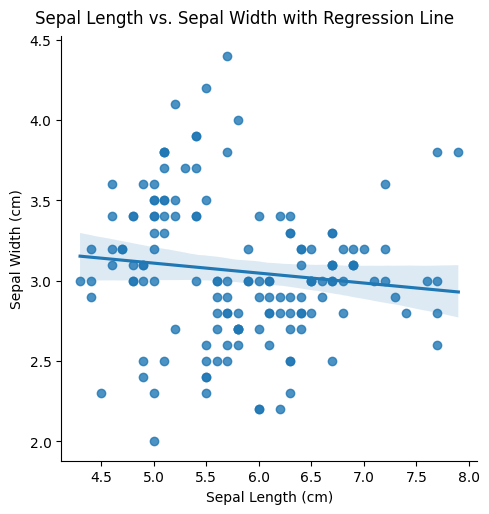

In [14]:
# Create a regression plot
regpl = sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    data=iris
)

# Set labels and title using FacetGrid methods
regpl.set_axis_labels("Sepal Length (cm)", "Sepal Width (cm)")
regpl.fig.suptitle("Sepal Length vs. Sepal Width with Regression Line", y=1.02)


**Interpretation:** The regression line confirms the earlier observation of a mildly negative association between sepal length and sepal width. The shaded area around the regression line represents the confidence interval for the regression estimate.

 **Note:**  that in this case we did not use  `.set_title()` or `.set_xlabel()` directly.  This is because `sns.lmplot` is a **figure-level**, and not a axes-level, function in Seaborn.  Instead, we can use `.set_axis_labels(x_label, y_label)` to set the x- and y-axis labels  and `.fig.suptitle(title)` to set the overall figure title.   



As we did before, we can use the `hue` parameter to color-code points and add different regression lines based on a categorical variable.

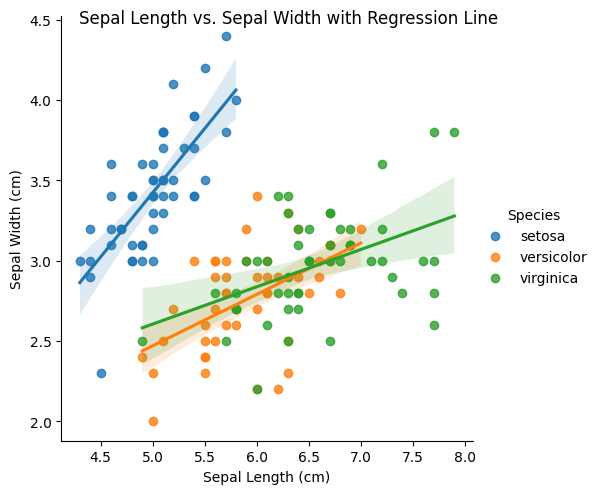

In [15]:
regpl_species = sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    hue="species",
    data=iris
)

regpl_species.set_axis_labels("Sepal Length (cm)", "Sepal Width (cm)")
regpl_species.fig.suptitle("Sepal Length vs. Sepal Width with Regression Line")
regpl_species._legend.set_title("Species")

**Interpretation:** The fitted regression lines show that the association between sepal length and width differs by species. For setosa, the relationship is clearly positive and steep, whereas for versicolor and virginica it is positive but much flatter.

## 6. Stacked Bar Graphs (Summing to 100%)

Stacked bar graphs are useful for showing how a total is divided into components. A **100% stacked bar graph** goes a step further by illustrating the *proportion* of each component within a category, making it easy to compare the relative contributions across groups of different sizes.

Here, we’ll use the `tips` dataset to visualize the proportion of smokers vs. non-smokers for each day of the week.  We can achieve this with Seaborn’s `histplot` by setting `hue` to `"smoker"` and `multiple="fill"`, which automatically stacks the bars to 100%.

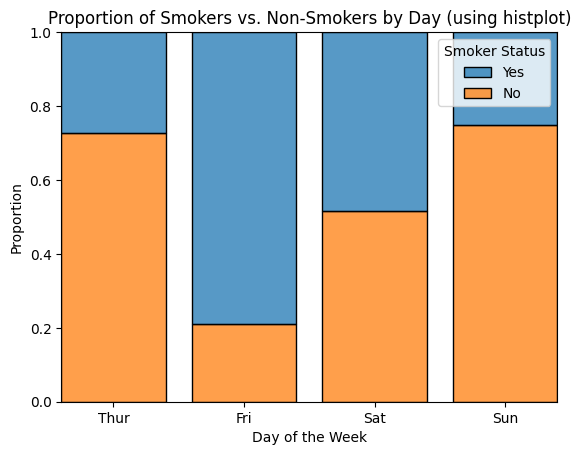

In [16]:
stackedpl = sns.histplot(
    data=tips,
    x="day",
    hue="smoker",
    multiple="fill",
    shrink=.8
)

stackedpl.set_title("Proportion of Smokers vs. Non-Smokers by Day (using histplot)")
stackedpl.set_xlabel("Day of the Week")
stackedpl.set_ylabel("Proportion")

# Change the title of the automatically created legend
stackedpl.legend_.set_title("Smoker Status")


Here, `multiple="fill"` automatically calculates the proportion of each category within every x-axis group and scales the bars so that each group fills to 100%.  

The `shrink` parameter controls the width of the bars as a fraction of the space assigned to each category:  
- `shrink=1` (default) means the bars take up the full available width.  
- Values less than 1 make the bars narrower, adding spacing between them.  
- In our case, `shrink=.8` makes each bar 80% of the full width, improving readability and reducing visual crowding.

**Interpretation:** The figure displays the proportion of smokers and non-smokers by day of the week. On Thursday and Sunday, non-smokers make up roughly three-quarters of bills. On Friday, smokers predominate, while Saturday shows a more balanced split between smokers and non-smokers.




## 7. Combining Graphs (Faceting)

Seaborn provides powerful tools for creating multi-panel plots, often referred to as "faceting". This allows you to visualize the same relationship across different subsets of your data. The primary functions for this are `sns.FacetGrid`

`FacetGrid` is a low-level interface for building structured grids of plots. You initialize it with a DataFrame and specify the variables that will define the rows, columns, and hues of the grid. Then, you map a plotting function onto the grid. Titles and legends can be managed directly through the `FacetGrid` object.

Let's use the `tips` dataset to show the relationship between `total_bill` and `tip` for each `day` and `time`.

### Scatter plot (Grid)

Text(0.5, 1.02, 'Total Bill vs. Tip by Time, Smoker Status, and Sex')

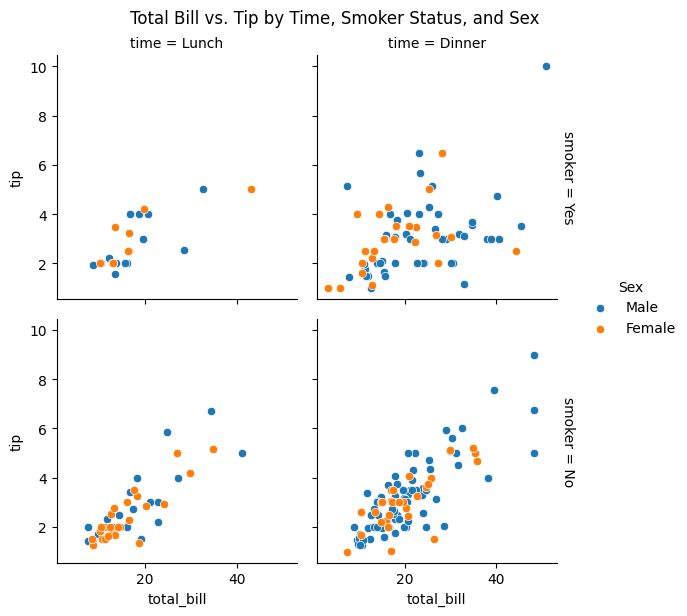

In [17]:
scat_facet = sns.FacetGrid(tips,
                  col="time",
                  row="smoker",
                  hue="sex",
                  margin_titles=True)

scat_facet.map(sns.scatterplot, "total_bill", "tip")
scat_facet.add_legend(title="Sex")
scat_facet.fig.suptitle("Total Bill vs. Tip by Time, Smoker Status, and Sex", y=1.02)


In this example:

- `col="time"` creates separate columns for each unique value in the `time` variable (Lunch, Dinner).
- `row="smoker"` creates separate rows for each unique value in the `smoker` variable (Yes, No).
- `hue="sex"` colors the points based on the `sex` variable (Male, Female).
- `g.map(sns.scatterplot, "total_bill", "tip")` applies the `scatterplot` function to each subplot, plotting `total_bill` on the x-axis and `tip` on the y-axis.
- `margin_titles=True` places the titles for each faceting variable (row and column labels) in the margins of the plot grid, making them easier to read and keeping the individual plots less cluttered.
- `y=1.02` in `.fig.suptitle` lifts the tile above the facet labels so they do not overal

**Interpretation:**  The figure plots tips against total bills, separated by time of day (lunch vs. dinner) and smoker status (yes vs. no), with points colored by sex (male vs female). Across all panels, tips rise with the size of the bill, though the relationship appears somewhat tighter among non-smokers. Dinner bills show more variation than lunch bills, reflecting both higher spending and greater dispersion in tipping. Smoker status does not visibly alter the relationship between bills and tips, and tipping patterns look broadly similar for men and women.


### Line Plot (Grid)

`FacetGrid` allows us to apply a variety of plot types across subsets of our data.  

In this example, we start by calculating the **tip percentage** for each observation by dividing the tip amount by the total bill and multiplying by 100.  

We then use a **FacetGrid** to visualize how the *average tip percentage* varies with **party size**, creating separate panels for meal time (`Lunch` vs. `Dinner`) and using line colors to distinguish the customer’s sex (`Male` vs. `Female`).  



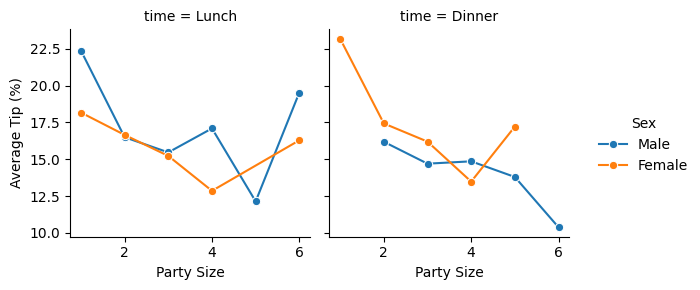

In [18]:
# let's calculate the tip % over the total bill
tips["tip_pct"] = tips["tip"] / tips["total_bill"] * 100  # tip percentage

# FacetGrid: Line plot of tip % by party size, split by time
line_facet = sns.FacetGrid(
    tips,
    col="time",      # Lunch vs Dinner
    hue="sex",       # Male vs Female
    margin_titles=True
)

line_facet.map_dataframe(
    sns.lineplot,
    x="size",
    y="tip_pct",
    estimator="mean",  # average tip % per party size
    marker="o",        # add points for clarity
    errorbar=None      # no error bars
)

line_facet.set_axis_labels("Party Size", "Average Tip (%)")
line_facet.add_legend(title="Sex")


Here:
- `estimator="mean"` calculates the **average** value of the y-variable (`tip_pct`) for each x-variable category (`size`). Without this, Seaborn would plot all individual data points instead of summarizing them.  
- `marker="o"` places a circular marker at each data point along the line, making the exact values and their positions easier to see.  
- `errorbar=None` removes the default confidence intervals (error bars) that Seaborn would otherwise display around the mean, resulting in a cleaner plot.

**Interpretation:** The plots show average tip percentages by party size, separated by time of day and sex of the payer. At both lunch and dinner, tip percentages decline as party size increases, though the decline is steeper at dinner. Women tend to tip more than men at dinner, especially in smaller parties, whereas at lunch the gap between men and women is narrower and less consistent.



### Pairplot

Pair plots (or scatterplot matrices) are used to visualize relationships between all pairs of numerical variables in a dataset, along with the distribution of each variable. This is very useful for initial exploratory data analysis. `sns.pairplot` automatically handles the creation of the entire grid

Text(0.5, 1.02, 'Pair Plot of Iris Dataset by Species')

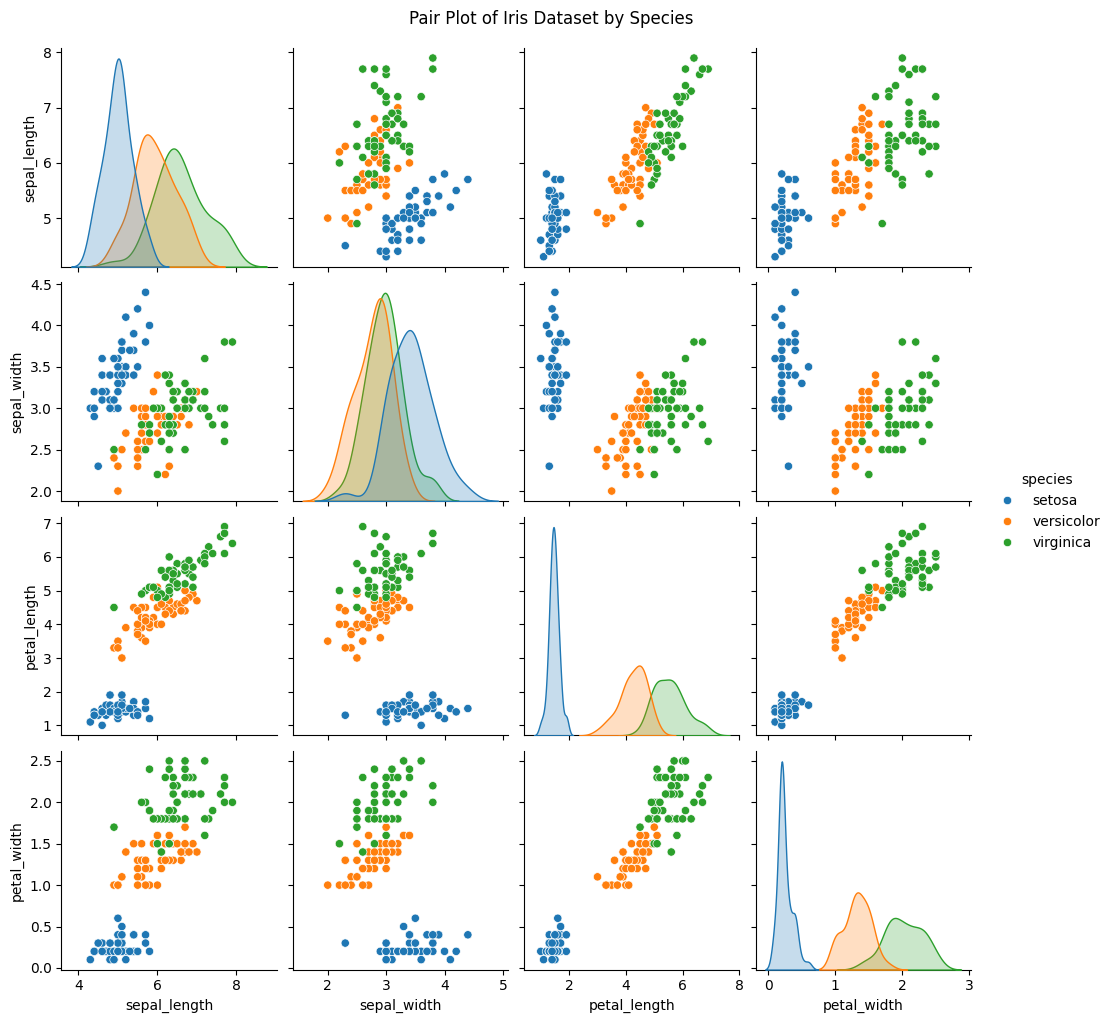

In [19]:
# Create a pair plot
pairpl = sns.pairplot(iris,
                      hue="species")

pairpl.fig.suptitle("Pair Plot of Iris Dataset by Species", y=1.02) # Add a main title

This generates a grid of plots where each numerical variable is plotted against every other numerical variable. The diagonal plots show the distribution of each variable (often a histogram or KDE plot), and the off-diagonal plots show scatter plots between pairs of variables. The `hue="species"` colors the points based on the species, helping to identify clusters.

**Interpretation:** The pair plot displays relationships among sepal length, sepal width, petal length, and petal width, separated by species. Some notable patters:

- Setosa (blue) forms a distinct cluster with small petals and relatively short sepals, making it easily distinguishable from the other two species.
- Versicolor (orange) and virginica (green) overlap on sepal measurements but separate clearly along petal length and petal width, where virginica shows consistently larger values.

## 8. Other useful plots  

###  Box Plots

Box plots (or box-and-whisker plots) are excellent for visualizing the distribution of numerical data and detecting outliers, especially when comparing distributions across different categories. They display the median, quartiles, and potential outliers.

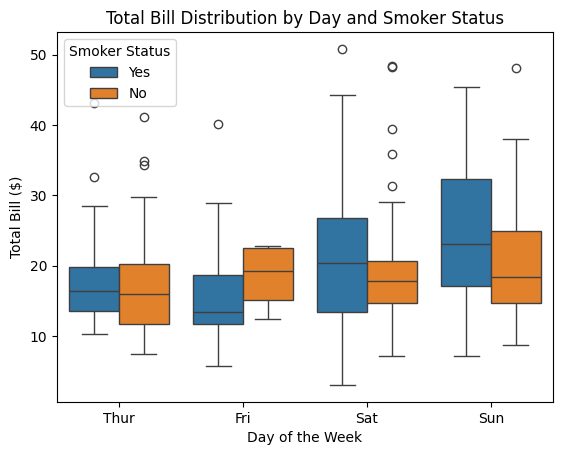

In [20]:
# Create a box plot
boxpl = sns.boxplot(x="day",
                    y="total_bill",
                    hue="smoker",
                    data=tips)


boxpl.set_title("Total Bill Distribution by Day and Smoker Status")
boxpl.set_xlabel("Day of the Week")
boxpl.set_ylabel("Total Bill ($)")
boxpl.legend(title="Smoker Status")


**Interpretation:** This plot shows the spread of `total_bill` for each day, separated by smoker status. The box represents the interquartile range (IQR), the line inside is the median, and the \'whiskers\' extend to 1.5 times the IQR from the box. Points beyond the whiskers are considered outliers and are more frequent among smokers.

### Violin Plots

Violin plots are similar to box plots but provide a richer description of the data distribution by showing the kernel density estimate of the data at different values. They are particularly useful when you want to see the shape of the distribution, not just summary statistics.

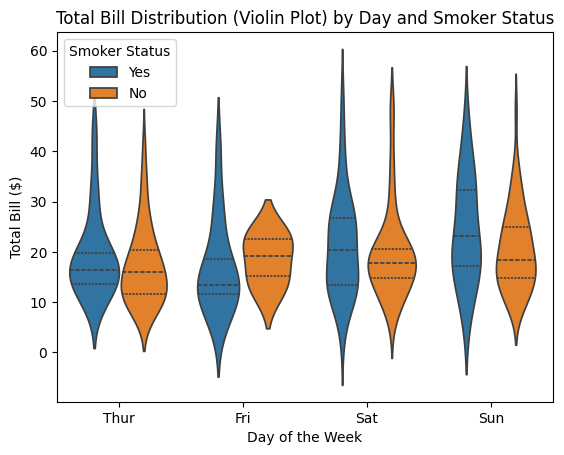

In [21]:
# Create a violin plot

violinpl = sns.violinplot(x="day",
                          y="total_bill",
                          hue="smoker",
                          data=tips,
                          inner="quartile")


violinpl.set_title("Total Bill Distribution (Violin Plot) by Day and Smoker Status")
violinpl.set_xlabel("Day of the Week")
violinpl.set_ylabel("Total Bill ($)")
violinpl.legend(title="Smoker Status")


Here, `inner="quartile"` draws lines for the quartiles inside the violins.

**Interpretation:** The width of each violin shows the density of bills at different amounts. The middle dashed line represents the median and is higher on weekends, indicating larger average spending. The other lines represent the IQR, just as we have seen in the box-plot above. The tails illustrate the overall range, with Fridays showing the tightest distribution and fewer extreme bills (especially for non smokers).


## 9. Customization

Seaborn provides its own function to easily control the aesthetics of your plots

### Setting Plot Style

Seaborn comes with several built-in themes that can quickly change the overall look of your plots. These themes are:
- `darkgrid` (default)
- `whitegrid`
- `dark`
- `white`
- `ticks`

You can set the style using `sns.set_style()`.

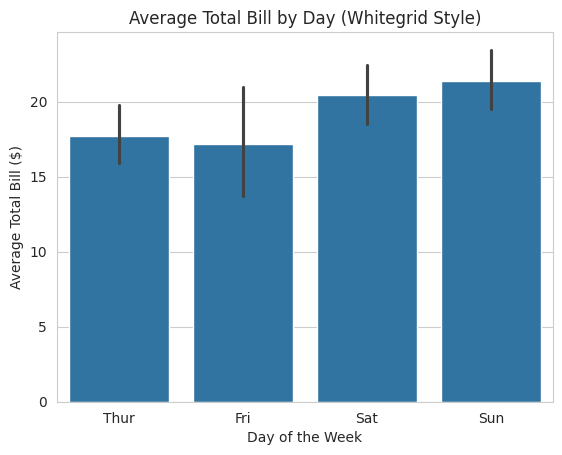

In [22]:
# Set a different style
sns.set_style("whitegrid")

barpl_white = sns.barplot(x="day", y="total_bill", data=tips)
barpl_white.set_title("Average Total Bill by Day (Whitegrid Style)")
barpl_white.set_xlabel("Day of the Week")
barpl_white.set_ylabel("Average Total Bill ($)")

# Reset to default or another style for subsequent plots
sns.set_style("darkgrid")


### Choosing Color Palettes

Seaborn makes it very easy to use different color palettes, which are sets of colors designed to work well together. You can use `sns.set_palette()` or specify the `palette` argument in individual plotting functions.

Seaborn offers various types of palettes:
- **Qualitative**: For distinct categories (e.g., `"deep"`, `"pastel"`, `"bright"`, `"dark"`, `"colorblind"`, `"Paired"`, `"Set1"`, `"tab10"`)
- **Sequential**: For data that progresses from low to high (e.g., `"Blues"`, `"Greens"`, `"Reds"`, `"viridis"`, `"magma"`)
- **Diverging**: For data that has a meaningful midpoint (e.g., `"coolwarm"`, `"RdBu"`, `"PuOr"`)

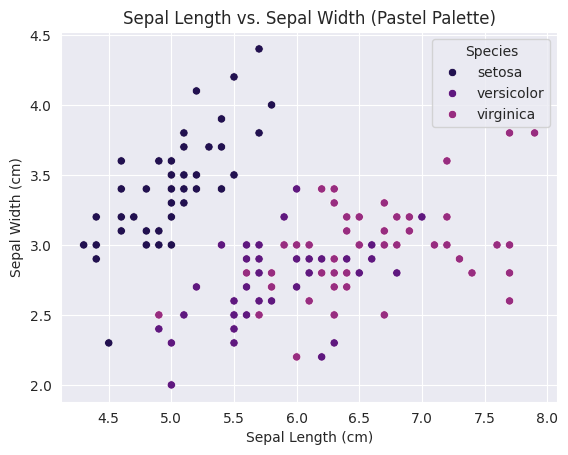

In [23]:
# Set palette globally
sns.set_palette("magma")

scttpl = sns.scatterplot(x="sepal_length",
                         y="sepal_width",
                         hue="species",
                         data=iris)

scttpl.set_title("Sepal Length vs. Sepal Width (Pastel Palette)")
scttpl.set_xlabel("Sepal Length (cm)")
scttpl.set_ylabel("Sepal Width (cm)")
scttpl.legend(title="Species")

# Reset palette to default
sns.set_palette("deep")


### Customizing Titles and Labels

You cann also costumize titles, labels, and other properties using its methods.

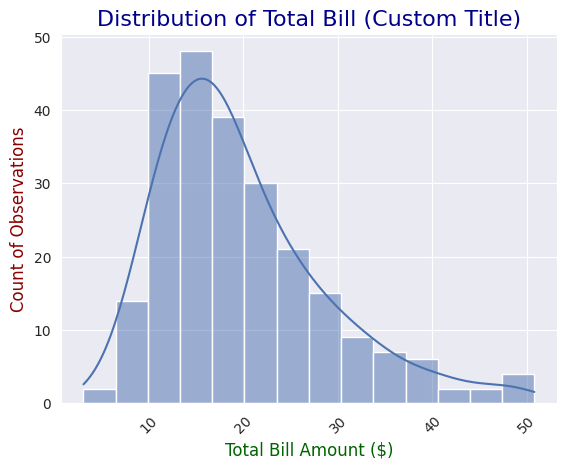

In [24]:
histpl = sns.histplot(data=tips,
                      x="total_bill",
                      kde=True)

# Customizing title and labels using Axes methods
histpl.set_title("Distribution of Total Bill (Custom Title)", fontsize=16, color='darkblue')
histpl.set_xlabel("Total Bill Amount ($)", fontsize=12, color='darkgreen')
histpl.set_ylabel("Count of Observations", fontsize=12, color='darkred')

# Rotate x-axis labels and adjust tick label size
histpl.tick_params(axis='x', rotation=45)
histpl.tick_params(axis='y', labelsize=10)


Here:

- `histpl.set_title("Distribution of Total Bill (Custom Title)", fontsize=16, color='darkblue')` Sets the plot title, increases the font size to 16, and changes the text color to dark blue.
- `histpl.set_xlabel("Total Bill Amount ($)", fontsize=12, color='darkgreen')`  
  Sets the x-axis label, adjusts the font size to 12, and changes the label color to dark green.
- `histpl.set_ylabel("Count of Observations", fontsize=12, color='darkred')`  
  Sets the y-axis label, adjusts the font size to 12, and changes the label color to dark red.
- `histpl.tick_params(axis='x', rotation=45)`  
  Rotates the tick labels on the x-axis by 45 degrees for better readability.
- `histpl.tick_params(axis='y', labelsize=10)`  
  Changes the font size of the y-axis tick labels to 10 for improved visual balance.


### Adjusting Figure Size and Layout

You can generally set a global default figure size with:


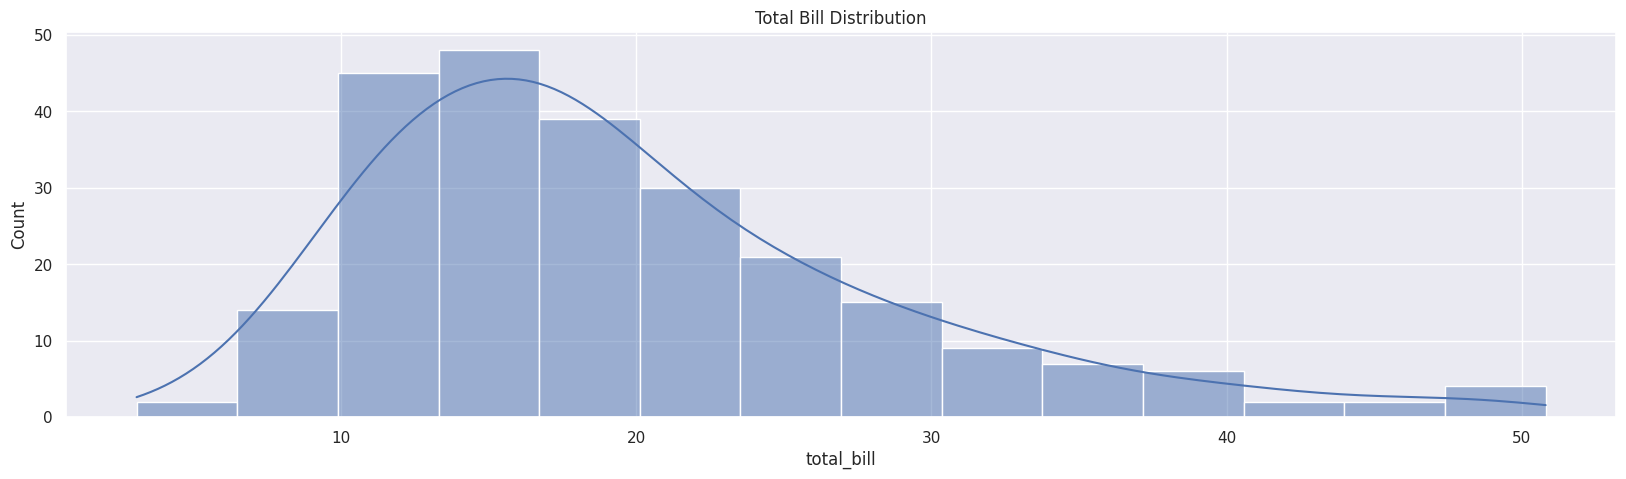

In [25]:
# Set figure size for all plots
sns.set(rc={'figure.figsize': (20, 5)})

# Create the plot
hist_wide = sns.histplot(
    data=tips,
    x="total_bill",
    kde=True
)
hist_wide.set_title("Total Bill Distribution")

# Reset to default figure size
sns.set(rc={'figure.figsize': (8, 6)})

## 10. Save plots

Once you’ve created a plot, you can save it as an image file (e.g., PNG, JPG) or a vector file (e.g., PDF, SVG) directly from Python. You can use `.figure.savefig()` on that plot to save it.




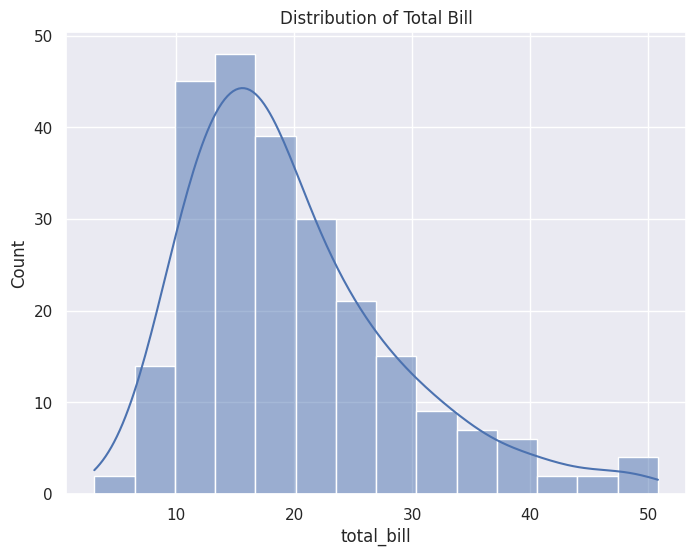

In [26]:
histpl = sns.histplot(data=tips,
                      x="total_bill",
                      kde=True)

histpl.set_title("Distribution of Total Bill")

# Save to file (PNG format)
histpl.figure.savefig("total_bill_distribution.png",
                      dpi=300,
                      bbox_inches="tight")


In Colab, you can click the **folder icon** in the left sidebar to view the plots saved locally during the current session. To download a plot, click the **three dots** next to its file name and select **Download**.

**Note:** Files saved in Colab are temporary, they are deleted when the runtime disconnects. To keep your plots, make sure to download them to your local computer before ending the session.


## Congratulations!

You have now completed a comprehensive tutorial on Seaborn. As you continue your journey in data science, remember that effective visualization is key to understanding your data and conveying your findings to others.

## References

- Seaborn Official Documentation: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)
- GeeksforGeeks - Python Seaborn Tutorial: [https://www.geeksforgeeks.org/python-seaborn-tutorial/](https://www.geeksforgeeks.org/python-seaborn-tutorial/)
- DataCamp - Seaborn Python Tutorial For Beginners: [https://www.datacamp.com/tutorial/seaborn-python-tutorial](https://www.datacamp.com/tutorial/seaborn-python-tutorial)
- Medium - Seaborn: A Comprehensive Guide to Statistical Data Visualization in Python: [https://medium.com/@RobuRishabh/seaborn-a-comprehensive-guide-to-statistical-data-visualization-in-python-60f0d7c1de33](https://medium.com/@RobuRishabh/seaborn-a-comprehensive-guide-to-statistical-data-visualization-in-python-60f0d7c1de33)

Questions or suggestions? Email Alberto at alberto.stefanelli@yale.edu.